In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [3]:
%matplotlib inline

In [4]:
stim = pd.read_pickle("/lab_data/tarrlab/common/datasets/NSD/nsddata/experiments/nsd/nsd_stim_info_merged.pkl")

In [5]:
# extract each subject's index for 1000 images
def extract_subject_trials_index_common(subj):
    index = list()
    for i in range(3):
        col = 'subject%01d_rep%01d' % (subj, i)
        assert len(stim[col][stim['shared1000']]) == 1000
        index.append(list(stim[col][stim['shared1000']]))
    assert len(index) == 3
    return index

In [6]:
def extract_common_data(subj):
    l = extract_subject_trials_index_common(subj)
    data = np.load("../output/cortical_voxel_across_sessions_subj%02d.npy" % subj)
    common_avg_data = (data[np.array(l[0]),:] + data[np.array(l[1]),:] + data[np.array(l[2]),:])/3
    
    assert len(common_avg_data) == 1000
    return common_avg_data


In [7]:
all_subjects = [1,2,5,7]

In [8]:
common_list = list()
for i in tqdm(all_subjects):
    common_list.append(extract_common_data(i))

In [19]:
rsm_list = list()
for cl in tqdm(common_list):
    rsm = np.corrcoef(cl)
    rsm_list.append(rsm)

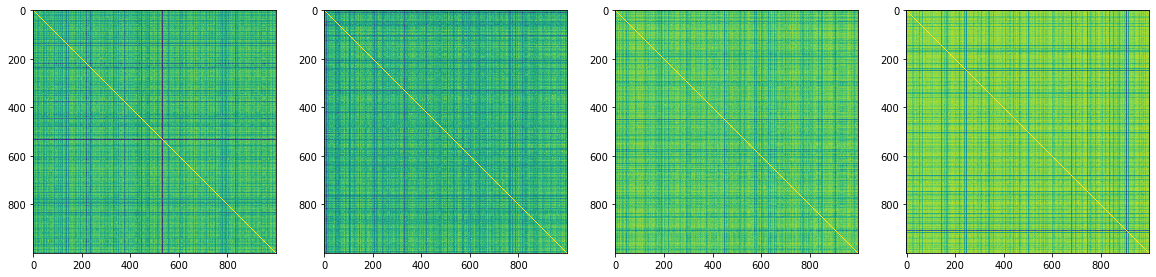

In [49]:
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(rsm_list[i])
# plt.colorbar()
plt.savefig("../figures/common1000_RDM_subj_2357.png")

In [38]:
r_list = list()

for i in range(len(all_subjects)-1):
    for j in range(len(all_subjects)-i-1):
        print((i, j+i+1))
        r_list.append(np.corrcoef(rsm_list[i].flatten(), rsm_list[j+i+1].flatten()))
        

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [39]:
r_list[0].shape

(2, 2)

In [47]:
rs = [r[0,1] for r in r_list]
print(sum(rs)/len(rs))

0.15351343225263323


## RDM on first image